**Ghailan Fadah**

Spring 2022

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [67]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [68]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

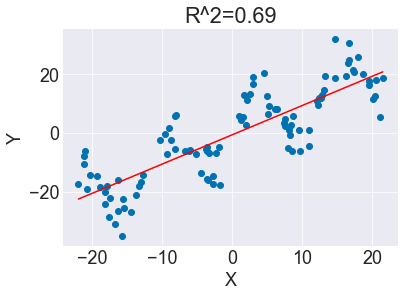

In [69]:
d = data.Data('data/poly_data.csv')
poly_reg = linear_regression.LinearRegression(d)
poly_reg.poly_regression(['X'], 'Y', 1)
poly_reg.scatter('X', 'Y', " ")

In [70]:
poly_reg.mean_sse()

71.81095284569933

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

55.030880732781014

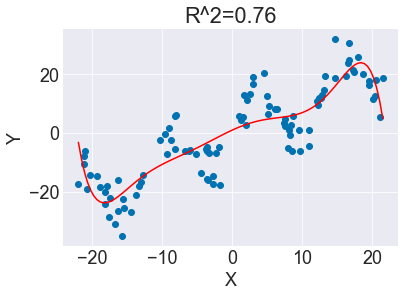

In [71]:
poly_reg2 = linear_regression.LinearRegression(d)
poly_reg2.poly_regression(['X'], 'Y', 7)
poly_reg2.scatter('X', 'Y', " ")
poly_reg2.mean_sse()


**Question 5:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.

**Answer 5:** The R^2 value improves by abit therefore, it seems to be a better fit. however it might be an overfit becuase the higher degree we go the more trend we lose. 

**Answer 6:** As the degree is increased the R^2 values increase slightly meanwhile the MSE value decreases slightly. In terms of visually, the line becomes a polynomial curve to match the degree and better fit through the data

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [72]:
fit_set = data.Data('data/poly_data.csv')
val_set = data.Data('data/poly_data.csv')
fit_set.limit_samples(0,50)
val_set.limit_samples(50,100)
print(fit_set)
print(val_set)

-----------------------------
data/poly_data.csv (50X2)
Headers: ['X', 'Y']
-----------------------------
 showing first 5/50 rows
[[ 2.147 11.382]
 [ 9.465  1.034]
 [ 4.52  20.251]
 [ 1.974  2.89 ]
 [-3.358 -6.809]]
-----------------------------
-----------------------------
data/poly_data.csv (50X2)
Headers: ['X', 'Y']
-----------------------------
 showing first 5/50 rows
[[ -3.65   -4.658]
 [  9.69   -6.107]
 [-21.986 -17.271]
 [ -8.694  -2.22 ]
 [-15.536 -25.608]]
-----------------------------


Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

38.30258184051851


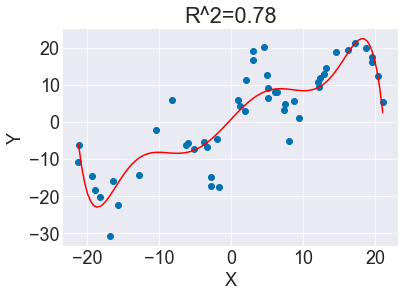

In [73]:
fit_lin = linear_regression.LinearRegression(fit_set)
fit_lin.poly_regression(['X'], 'Y', 7)
fit_lin.scatter('X', 'Y', " ")
print(fit_lin.mean_sse())

c = fit_lin.c





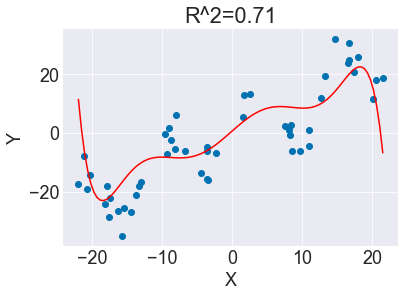

In [74]:
val_lin = linear_regression.LinearRegression(val_set)
val_lin.linear_regression(['X'], 'Y')
val_lin.initialize(['X'], 'Y', c, 7)
val_lin.scatter('X', 'Y', " ")


**Question 7:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 8:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSSE, $R^2$).

**Question 9:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 10:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSSE, $R^2$).

**Answer 7:** They do a pretty good job, from the looks of it the R^2 value was barely effected from .78 to .71 between sets likewise for the MSSE 

**Answer 8:** It seems that while the overfit of the R^2 value goes down the difference between got smaller. for example when the degree was 4 the sit set had an R^2 of .70 and the val set had an R^2 of .71. therefore, the generalization improved

**Answer 9:** A range between 1-7 seems to generalize acceptly and I believe this is mostly due to both sets of data being able to fit a degree of up to 7 without breaking down.

**Answer 10:** When the degree is 10 the fit set has a R^2 of .87 and an MSSE of 22.3 while the val set has an R^2 of .71 this hints that we have overfitted our data. This occurs because our model becomes so specific to our fit data that it no longer is able to reliably fit anything else even a sub set of the orginal data. At degree 13 we begin to see the math break down and our model becoming worse even for the fit set as the R^2 value drops to .71 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

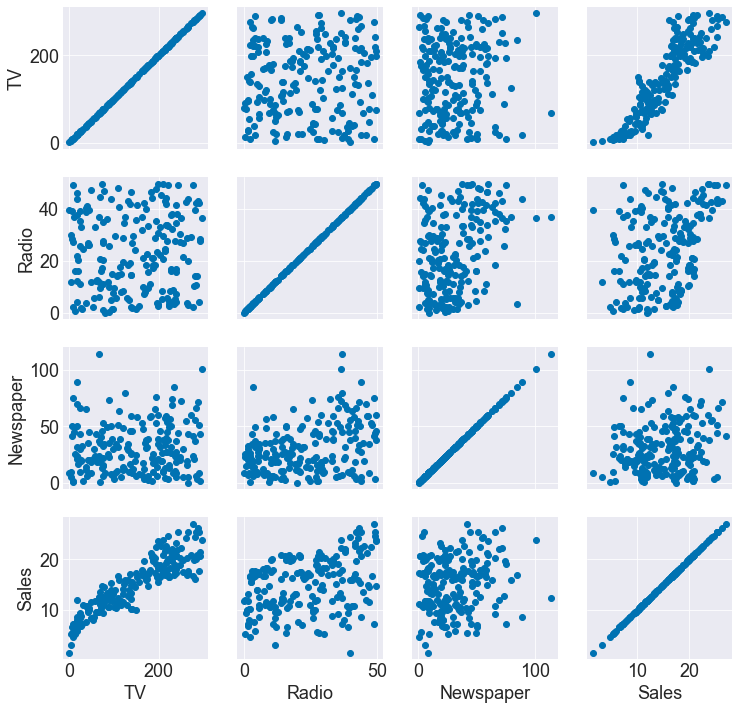

In [75]:
import analysis as an 

ex_data = data.Data('data/advertising.csv')
ex_an = an.Analysis(ex_data)
ex_an.pair_plot(["TV","Radio","Newspaper","Sales"]);

For my extension, I decided to look at a dataset that records the amount of money spent on marketing and the number of sales and see if there is a linear relationship between the number of sales and the money spent on TV, the money spent on radio, and the money spent on newspaper. From the pair plot above, I hypotheseize that there is a linear relationship between the money spent on TV ads and the number of sales.  

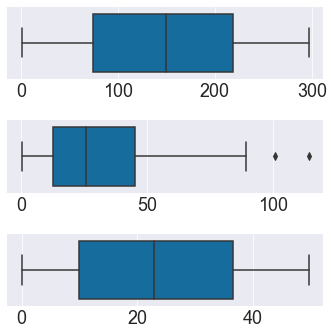

In [76]:

import seaborn as sns




fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ex_data.select_data(['TV']), ax = axs[0])
plt2 = sns.boxplot(ex_data.select_data(['Newspaper']), ax = axs[1])
plt3 = sns.boxplot(ex_data.select_data(['Radio']), ax = axs[2])
plt.tight_layout()

In the above cell I checked for any outliers as that would heavely affect my model and from the looks of it we don't have any that are super outliers so we don't have to worry about that.

27.086772697557038

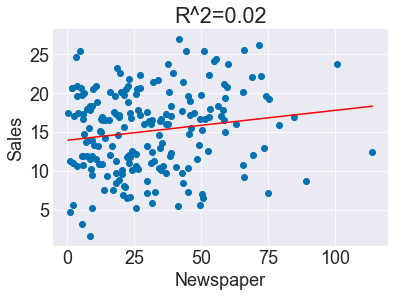

In [77]:
ex_lin = linear_regression.LinearRegression(ex_data)
ex_lin.linear_regression(["Newspaper"], "Sales")
ex_lin.scatter("Newspaper", "Sales", " ")
ex_lin.mean_sse()

24.384049466937636

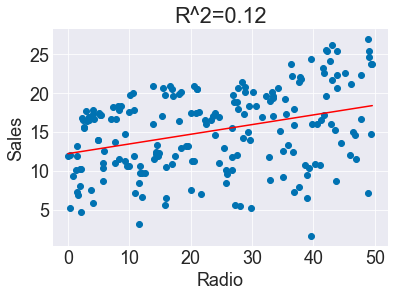

In [78]:
ex_lin = linear_regression.LinearRegression(ex_data)
ex_lin.linear_regression(["Radio"], "Sales")
ex_lin.scatter("Radio", "Sales", " ")
ex_lin.mean_sse()

5.2177438977951285

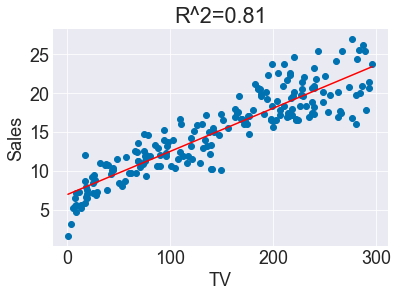

In [102]:
ex_lin = linear_regression.LinearRegression(ex_data)
ex_lin.linear_regression(["TV"], "Sales")
ex_lin.scatter("TV", "Sales", " ")
ex_lin.mean_sse()

From the plots displayed above, it beomes clear that there is in fact a somewhat strong linear relationship between the money spent on TV ads and number of sales with a R^2 of .81 and MSSE of 5.2. This is untrue however for both Radio and Newspaper which had a R^2 of .12 and 0.02 and a MSSE of 24.38 and 27.1 respectively. therefore, the company should spend more money on TV ads

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

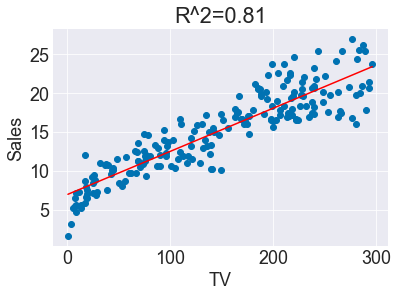

In [101]:
ex2_data = data.Data('data/advertising.csv')
ex2_lin = linear_regression.LinearRegression(ex2_data)
ex2_lin.normal_equation(["TV"], "Sales")
ex2_lin.scatter("TV", "Sales", " ")



I was really excited when one of the extensions was to implend linear regression using the normal equation method becuase that it how I understood linear regression when I took linear Algebra here at Colby. After impleminting the method normal_equation(), which was pretty straight forward. I used it on my advertising data and got the same result as if I ran my linear_regression method. The only problem with the normal equation is that its time complexity is big O(n^3). This means that it scales up horribly for bigger data sets due to having to invert the matrix. Another reason, why it isn't an optimal solution is due to the possibility the matrix not being inverrtible in the first place.    

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

4.548428678125259

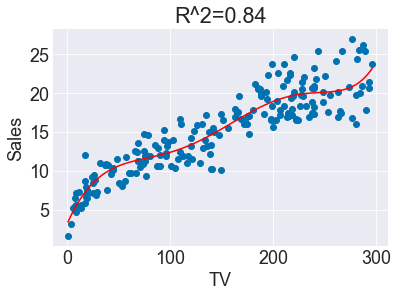

In [106]:
ex_lin.poly_regression(["TV"], "Sales", 6)
ex_lin.scatter("TV", "Sales", " ")
ex_lin.mean_sse()

Any degree from 1-6 gives a pretty good R^2 (.81 to .84) along with MMSE (5.2 to 4.5). I wanted to see if this small betterment in R^2 value came at a cost of losing trends in my model therefore below I have split the data in half and ran to see if the model has over fit. 

In [103]:
exfit_set = data.Data('data/advertising.csv')
exval_set = data.Data('data/advertising.csv')
exfit_set.limit_samples(0,100)
exval_set.limit_samples(100,200)

4.166781947273924


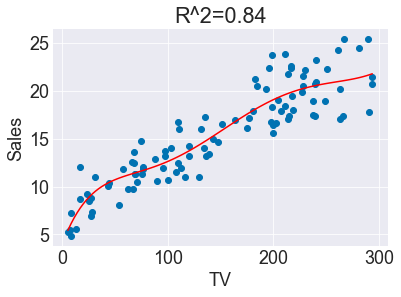

In [104]:
exfit_lin = linear_regression.LinearRegression(exfit_set)
exfit_lin.poly_regression(['TV'], 'Sales', 6)
exfit_lin.scatter('TV', 'Sales', " ")
print(exfit_lin.mean_sse())

c = exfit_lin.c

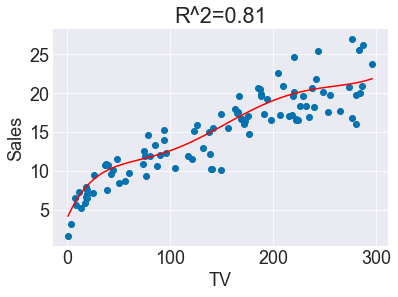

In [105]:
exval_lin = linear_regression.LinearRegression(exval_set)
exval_lin.linear_regression(['TV'], 'Sales')
exval_lin.initialize(['TV'], 'Sales', c, 6)
exval_lin.scatter('TV', 'Sales', " ")

From the above plots we see that with a degree of 6 we obtain a R^2 value of .84 which is really good, however when we run that model on our validation set we get a value of .81. This suggest that we have overfit our model becuase it is becoming so specfic to the training set that it no longer performs well in the validation set even if both set are just subsets of the the whole data set. Therefore, A lower degree should be used and in fact a degree of one works just as well 

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.